## Final training and testing using the full MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml, load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from copy import deepcopy
import seaborn as sns
import itertools
import copy
import autograd.numpy as np
import pandas as pd
from tqdm import tqdm

from activation_functions import *
from cost_functions import *
from FFNN import *

# Setting the random seed
np.random.seed(42)

### Library used for selecting the right fontsize wrt revtex4 in LaTeX

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Widths in inches from revtex4's layout
# Single column ~3.375in, double column ~7in
columnwidth = 3.375  # use 7.0 for two-column-wide figures

# Compute figure size (width, height)
fig_width = columnwidth
fig_height = columnwidth / 1.618  # golden ratio for aesthetics
fig_size = [fig_width, fig_height]

mpl.rcParams.update({
    # Use LaTeX for text rendering
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": [],  # empty means use LaTeX default (Computer Modern)
    "font.size": 10.0,  # matches REVTeX's \normalsize

    # Adjust tick and label sizes
    "axes.labelsize": 10.0,
    "legend.fontsize": 8.0,
    "xtick.labelsize": 8.0,
    "ytick.labelsize": 8.0,

    # Figure dimensions
    "figure.figsize": fig_size,

    # Save with good resolution
    "savefig.dpi": 300,
})

In [3]:
# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
# Extract data (features) and target (labels)
X = mnist.data
y = mnist.target

# Scaling the mnist pixel values from 0-255 to 0-1
X = X / 255.0

In [4]:
# Splitting the data into testing, training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# One-hot encoding
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)


In [ ]:
# Define parameters
layer_output_size = [500, 10]
eta = 0.01
activation_funcs = [sigmoid, softmax]
epochs = 100

# Setting L2 lambda
l2_lmbda = 0.001

network_input_size = X_train.shape[1]

In [9]:
# Create network
NN_baseline = NeuralNetwork(network_input_size, layer_output_size, activation_funcs, cross_entropy)

NN_reg_l2 = NeuralNetwork(network_input_size, layer_output_size, activation_funcs, cross_entropy, l1_lambda=0, l2_lambda=l2_lmbda)
NN_reg_l2.layers = copy.deepcopy(NN_baseline.layers)


In [11]:
# Store results across all runs
baseline_all_runs_results = []

    
for epoch in range(1, epochs + 1):
    # Training network
    train_network_SRMSprop(NN_baseline, X_train, y_train, eta=eta, epochs=1)
    
    # Get predictions
    train_pred = NN_baseline.predict(X_train)
    test_pred = NN_baseline.predict(X_test)
    
    # Compute accuracy
    train_acc = accuracy(train_pred, y_train)
    test_acc = accuracy(test_pred, y_test)
    
    # Calculate overfitting gap
    overfit_gap = train_acc - test_acc
    
    # Store results
    baseline_all_runs_results.append({
        'epoch': epoch,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'overfit_gap': overfit_gap
    })
    
    # Print progress every 25 epochs
    if epoch % 25 == 0 or epoch == 1:
        print(f"Epoch {epoch}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")


# Convert to DataFrame
df_baseline_all_runs = pd.DataFrame(baseline_all_runs_results)

Epoch 1: Train Acc = 0.9492, Test Acc = 0.9414
Epoch 25: Train Acc = 0.9767, Test Acc = 0.9626
Epoch 50: Train Acc = 0.9831, Test Acc = 0.9617


c:\Users\eirik\Desktop\FYSSTK3155_Dataprocessing_and_MachineLearning\Project2_FYSSTK3155-4155\.venv\Lib\site-packages\autograd\numpy\numpy_vjps.py:125: RuntimeWarning: overflow encountered in square
  lambda ans, x, y: unbroadcast_f(y, lambda g: -g * x / y**2),


Epoch 75: Train Acc = 0.9814, Test Acc = 0.9624
Epoch 100: Train Acc = 0.9836, Test Acc = 0.9614


KeyboardInterrupt: 

In [13]:
# Convert to DataFrame
df_baseline_all_runs = pd.DataFrame(baseline_all_runs_results)

df_baseline_all_runs.to_csv("MNIST-full_baseline_results.csv", index=False)

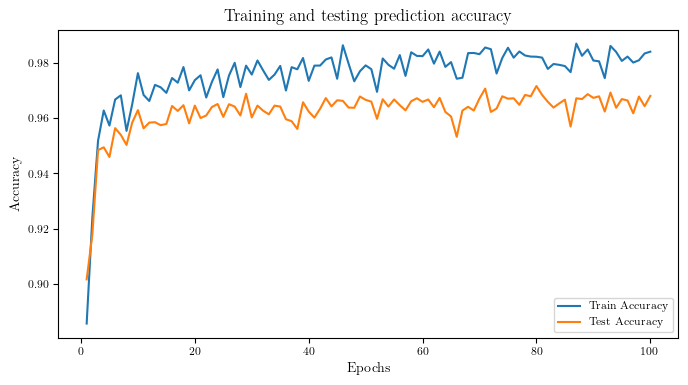

In [ ]:
# Plot mean accuracy
plt.figure(figsize=(8, 4))
plt.plot(df_baseline_mean_results['epoch'], df_baseline_mean_results['train_acc'], label='Train Accuracy')
plt.plot(df_baseline_mean_results['epoch'], df_baseline_mean_results['test_acc'], label='Test Accuracy')
plt.title(f'Mean Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

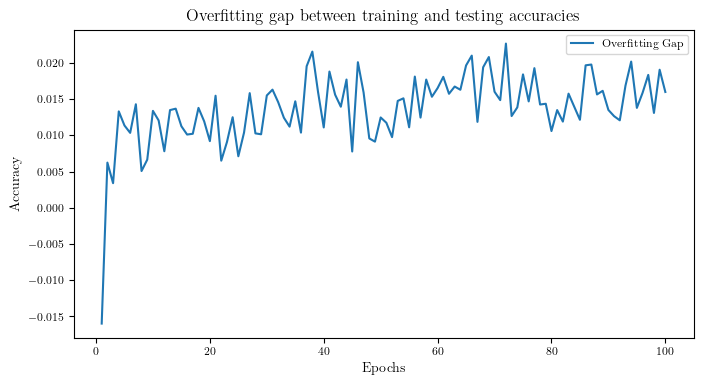

In [ ]:
# Plot mean overfitting gap
plt.figure(figsize=(8, 4))
plt.plot(df_baseline_mean_results['epoch'], df_baseline_mean_results['overfit_gap'], label='Overfitting Gap')
plt.title(f'Mean Overfitting Gap')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Reg testing

In [ ]:
# Store results across all runs
reg2_all_runs_results = []

for epoch in range(1, epochs + 1):
    # Training network
    train_network_SRMSprop(NN_reg_l2, X_train, y_train, eta=eta, epochs=1)
    
    # Get predictions
    train_pred = NN_reg_l2.predict(X_train)
    test_pred = NN_reg_l2.predict(X_test)
    
    # Compute accuracy
    train_acc = accuracy(train_pred, y_train)
    test_acc = accuracy(test_pred, y_test)
    
    # Calculate overfitting gap (important for regularization analysis!)
    overfit_gap = train_acc - test_acc
    
    # Store results
    reg2_all_runs_results.append({
        'epoch': epoch,
        'lambda2': l2_lmbda,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'overfit_gap': overfit_gap
    })
    
    # Print progress every 50 epochs
    if epoch % 25 == 0 or epoch == 1:
        print(f"Epoch {epoch}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}, Gap = {overfit_gap:.4f}")

# Convert to DataFrame
df_reg2_all_runs = pd.DataFrame(reg2_all_runs_results)

df_reg2_all_runs.to_csv("MNIST-full_reg_results.csv", index=False)

In [ ]:
# Plot mean accuracy
plt.figure(figsize=(8, 4))
plt.plot(df_reg2_all_runs['epoch'], df_reg2_all_runs['train_acc'], label='Train Accuracy')
plt.plot(df_reg2_all_runs['epoch'], df_reg2_all_runs['test_acc'], label='Test Accuracy')
plt.title(f'Mean Accuracy across {n_runs} runs (λ2={l2_lmbda})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Plot mean overfitting gap
plt.figure(figsize=(8, 4))
plt.plot(df_reg2_all_runs['epoch'], df_reg2_all_runs['overfit_gap'], label='Overfitting Gap')
plt.title(f'Mean Overfitting Gap across {n_runs} runs (λ2={l2_lmbda})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Tensorflow comparison

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert one-hot encoded labels back to integer labels for Keras
y_train_keras = np.argmax(y_train, axis=1)
y_test_keras = np.argmax(y_test, axis=1)

# Define parameters matching implementation
epochs = 100
eta = 0.01

# Store results
keras_all_runs_results = []

# Create model matching architecture: 784 -> 500 -> 10
# NO regularization
model = keras.Sequential([
    layers.Dense(500, activation='sigmoid', 
                 input_shape=(X_train.shape[1],)),
    layers.Dense(10, activation='softmax')
])

# Use RMSprop optimizer to match train_network_SRMSprop
optimizer = keras.optimizers.RMSprop(learning_rate=eta)

# Compile model with categorical crossentropy
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train for one epoch at a time to track progress like implementation
for epoch in range(1, epochs + 1):
    # Train for 1 epoch
    history = model.fit(
        X_train, y_train_keras,
        epochs=1,
        verbose=0,
        validation_data=(X_test, y_test_keras)
    )
    
    # Get accuracy
    train_acc = history.history['accuracy'][0]
    test_acc = history.history['val_accuracy'][0]
    
    # Calculate overfitting gap
    overfit_gap = train_acc - test_acc
    
    # Store results
    keras_all_runs_results.append({
        'epoch': epoch,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'overfit_gap': overfit_gap
    })
    
    # Print progress every 25 epochs
    if epoch % 25 == 0 or epoch == 1:
        print(f"Epoch {epoch}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

# Convert to DataFrame
df_keras_all_runs = pd.DataFrame(keras_all_runs_results)
df_keras_all_runs.to_csv("MNIST-full_Keras_results.csv", index=False)

print("\nKeras Results (No Regularization):")
print(df_keras_all_runs.head(10))

### Tensorflow with L2 regularization

In [ ]:
## With reg
# Define parameters matching implementation
epochs = 100
eta = 0.01
l2_lmbda = 0.001

# Store results across all runs
keras_all_runs_results = []


# Create model matching architecture: 784 -> 500 -> 10
model = keras.Sequential([
    layers.Dense(500, activation='sigmoid', 
                    input_shape=(X_train.shape[1],),
                    kernel_regularizer=regularizers.l2(l2_lmbda)),
    layers.Dense(10, activation='softmax',
                    kernel_regularizer=regularizers.l2(l2_lmbda))
])

# Use RMSprop optimizer to match train_network_SRMSprop
optimizer = keras.optimizers.RMSprop(learning_rate=eta)

# Compile model with categorical crossentropy
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train for one epoch at a time to track progress like implementation
for epoch in range(1, epochs + 1):
    # Train for 1 epoch
    history = model.fit(
        X_train, y_train_keras,
        epochs=1,
        verbose=0,
        validation_data=(X_test, y_test_keras)
    )
    
    # Get accuracy
    train_acc = history.history['accuracy'][0]
    test_acc = history.history['val_accuracy'][0]
    
    # Calculate overfitting gap
    overfit_gap = train_acc - test_acc
    
    # Store results
    keras_all_runs_results.append({
        'epoch': epoch,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'overfit_gap': overfit_gap
    })
    
    # Print progress every 25 epochs
    if epoch % 25 == 0 or epoch == 1:
        print(f"Epoch {epoch}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

# Convert to DataFrame
df_keras_all_runs_reg = pd.DataFrame(keras_all_runs_results)

# Save as CSV
df_keras_all_runs_reg.to_csv("MNIST-full_Keras_reg_results.csv", index=False)

## Comparison viz

In [ ]:
# Plot comparison of mean accuracy
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# implementation
axes[0].plot(df_baseline_mean_results['epoch'], 
             df_baseline_mean_results['train_acc'], 
             label='Train Accuracy', linewidth=2)
axes[0].plot(df_baseline_mean_results['epoch'], 
             df_baseline_mean_results['test_acc'], 
             label='Test Accuracy', linewidth=2)
axes[0].set_title(f'Your Implementation (RMSprop)\nMean Accuracy across {n_runs} runs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Keras implementation
axes[1].plot(df_keras_mean_results['epoch'], 
             df_keras_mean_results['train_acc'], 
             label='Train Accuracy', linewidth=2)
axes[1].plot(df_keras_mean_results['epoch'], 
             df_keras_mean_results['test_acc'], 
             label='Test Accuracy', linewidth=2)
axes[1].set_title(f'TensorFlow/Keras (RMSprop)\nMean Accuracy across {n_runs} runs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Plot comparison of mean accuracy
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# implementation
axes[0].plot(df_baseline_mean_results['epoch'], 
             df_baseline_mean_results['train_acc'], 
             label='Train Accuracy', linewidth=2)
axes[0].plot(df_baseline_mean_results['epoch'], 
             df_baseline_mean_results['test_acc'], 
             label='Test Accuracy', linewidth=2)
axes[0].set_title(f'Your Implementation (RMSprop)\nMean Accuracy across {n_runs} runs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Keras implementation
axes[1].plot(df_keras_mean_results['epoch'], 
             df_keras_mean_results['train_acc'], 
             label='Train Accuracy', linewidth=2)
axes[1].plot(df_keras_mean_results['epoch'], 
             df_keras_mean_results['test_acc'], 
             label='Test Accuracy', linewidth=2)
axes[1].set_title(f'TensorFlow/Keras (RMSprop)\nMean Accuracy across {n_runs} runs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Direct comparison on same plot
plt.figure(figsize=(12, 5))

# Test accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(df_baseline_mean_results['epoch'], 
         df_baseline_mean_results['test_acc'], 
         label='Your Implementation', linewidth=2)
plt.plot(df_keras_mean_results['epoch'], 
         df_keras_mean_results['test_acc'], 
         label='TensorFlow/Keras', linewidth=2, linestyle='--')
plt.title('Test Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Overfitting gap comparison
plt.subplot(1, 2, 2)
plt.plot(df_baseline_mean_results['epoch'], 
         df_baseline_mean_results['overfit_gap'], 
         label='Your Implementation', linewidth=2)
plt.plot(df_keras_mean_results['epoch'], 
         df_keras_mean_results['overfit_gap'], 
         label='TensorFlow/Keras', linewidth=2, linestyle='--')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.title('Overfitting Gap Comparison')
plt.xlabel('Epochs')
plt.ylabel('Gap (Train - Test Accuracy)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Summary statistics comparison
print("\n=== Final Performance Comparison ===")
print(f"\nYour Implementation (at epoch {epochs}):")
print(f"  Mean Train Accuracy: {df_baseline_mean_results.iloc[-1]['train_acc']:.4f}")
print(f"  Mean Test Accuracy:  {df_baseline_mean_results.iloc[-1]['test_acc']:.4f}")
print(f"  Mean Overfit Gap:    {df_baseline_mean_results.iloc[-1]['overfit_gap']:.4f}")

print(f"\nTensorFlow/Keras (at epoch {epochs}):")
print(f"  Mean Train Accuracy: {df_keras_mean_results.iloc[-1]['train_acc']:.4f}")
print(f"  Mean Test Accuracy:  {df_keras_mean_results.iloc[-1]['test_acc']:.4f}")
print(f"  Mean Overfit Gap:    {df_keras_mean_results.iloc[-1]['overfit_gap']:.4f}")

# Statistical comparison across all runs
print(f"\n=== Statistical Summary Across {n_runs} Runs (Final Epoch) ===")
final_epoch_baseline = df_baseline_all_runs[df_baseline_all_runs['epoch'] == epochs]
final_epoch_keras = df_keras_all_runs[df_keras_all_runs['epoch'] == epochs]

print("\nYour Implementation:")
print(f"  Test Accuracy: {final_epoch_baseline['test_acc'].mean():.4f} ± {final_epoch_baseline['test_acc'].std():.4f}")

print("\nTensorFlow/Keras:")
print(f"  Test Accuracy: {final_epoch_keras['test_acc'].mean():.4f} ± {final_epoch_keras['test_acc'].std():.4f}")